<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
# данные удалены перед фиксацией работы в GitHub
DBNAME = '*'
USER = '*'
PASSWORD = '*'
HOST = '*'
PORT = *

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса

query_3_1 = f'''select count(id)
            from public.vacancies 
            '''
number_id = pd.read_sql_query (query_3_1, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2561306431.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_id = pd.read_sql_query (query_3_1, connection)


In [5]:
# результат запроса
number_id

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select count(id)
            from employers
            '''
number_employers = pd.read_sql_query (query_3_2, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/809978614.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_employers = pd.read_sql_query (query_3_2, connection)


In [7]:
# результат запроса
number_employers

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3= f'''select count(id)
            from areas
            '''
number_areas = pd.read_sql_query (query_3_3, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/155594491.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_areas = pd.read_sql_query (query_3_3, connection)


In [9]:
# результат запроса
number_areas

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4= f'''select count(id)
            from industries
            '''
number_industries = pd.read_sql_query (query_3_4, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/601532914.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_industries = pd.read_sql_query (query_3_4, connection)


In [11]:
# результат запроса
number_industries

,count
0,294


***

# выводы по предварительному анализу данных
На основе предварительного анализа уже можно сделать некоторые усредненые выводы, например:
- В среднем каждый работодатель предлагает по 2 вакании, т к число представленных вакансий составляет 49197, а число работодателей 23591
- Мы знаем, что количество сфер деятельности составляет 294 сферы, из этого следует, что в среднем в каждой сфере деятельности задействовано 80 компаний (23591/294), и на каждую сферу деятельности приходится 167 вакансий (49197/294) 
- В исходных данных представлена достаточно широкая георграфия регинов, всего 1362 региона. То есть в среднем в каждом регионе находится 17 компаний (23591/1362), и на каждый регион приходится по 36 вакансий(49197/1362).
Очень важно учитывать, что все сделанные выводы усреднены и расчитываются, как среднее арифметическое, без учета возможных отклонений и выбросов. В полученных данных наверняка есть такие компании, которые представлены в меньшем количестве регионов и при этом нуждаются в закрытии более, чем двух вакансий. Поэтому переходит к следующему этапу: детальному анализу, и начнем с анализа вакансий.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1= f''' 
            select 
            a.name area,
            count(v.id) cnt
            from public.vacancies v
            join areas a on a.id = v.area_id
            group by 1
            order by 2 desc
            limit 5
            '''
vacancy_for_area = pd.read_sql_query (query_4_1, connection)


/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/3509178149.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancy_for_area = pd.read_sql_query (query_4_1, connection)


In [13]:
# результат запроса
vacancy_for_area

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2= f''' 
            select 
            count(v.id)
            from public.vacancies v
            where (v.salary_from is not null) or (v.salary_to is not null) 
            '''
number_not_null = pd.read_sql_query (query_4_2, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/1887227621.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_not_null = pd.read_sql_query (query_4_2, connection)


In [15]:
# результат запроса
number_not_null

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3= f''' 
            select 
            avg(v.salary_from) min_avg,
            avg(v.salary_to) max_avg
            from public.vacancies v
            '''
middle = pd.read_sql_query (query_4_3, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/3374161757.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  middle = pd.read_sql_query (query_4_3, connection)


In [17]:
# результат запроса
round(middle)

,min_avg,max_avg
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4= f''' 
            select 
            v.schedule,
            v.employment,
            count(v.id)
            from public.vacancies v
            group by 1,2
            order by 3 desc
            offset 1 limit 1
            '''
popular = pd.read_sql_query (query_4_4, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2439440176.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular = pd.read_sql_query (query_4_4, connection)


In [19]:
# результат запроса
popular

,schedule,employment,count
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5= f''' 
            select 
            v.experience,
            count(v.id)
            from public.vacancies v
            group by 1
            order by 2 asc
            '''
experience_for_job = pd.read_sql_query (query_4_5, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/4012871940.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience_for_job = pd.read_sql_query (query_4_5, connection)


In [21]:
# результат запроса
experience_for_job

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# выводы по детальному анализу вакансий
На основе детального анализа вакансий можно сделать следующие выводы: 
- Ожидаемо, наибоильшое число вакансий приходится на крупные административные центры и города-миллионники такие, как Москва (наибольшее число вакансий - 5333 вакансий), Санкт-Петербург, Новосибирск и пр.
- Чуть меньше половины работодателей (24073 из 49197) предоставили информацию об ожидаемом уровне зарплаты. Данный фактор наталкивает на мысль, что половина работодателей не торопится объявлять з/п и будет лишь по итогам собеседования оценивать соискателя, что свидетельствует о перенасыщении рынка специалистов IT- направления, что в свою очередь позволяет работодателю диктовать условия найма.  
- Предыдущий вывод важно учитывать при дальнейшем анализе зарплаты, т к половина компаний предпочла скрыть информацию об уровне з/п, что будет влиять на дальнейшие расчеты такие, как максимальный и минимальный уровень заработной платы. В нашем случае средние значения составляют 110537 и 71065 соответственно, что дает соискателю понимание на, что он может расчитывать, только начиная свой профессиональный путь, и чего может достигнуть в будущем. Опять же здесь надо помнить, что мы рассматриваем средние значения и вилка зарплаты будеть отличаться в зависимости от региона, опыта соискателя и условий работы
- Говоря об условиях работы, работодатели очевидно заинтересованы в полной занятости для соискателей и полном их рабочем дне или удаленной работе (на втором месте по популярности запроса), что уменьшает шансы для молодых срециалистов или студентов в получении работы. Данная картина типична для российского рынка, для которого не характерны такие типы трудоустройства, как гибкий график или проектная работа.
- Ну и конечно, большую роль играет имеющийся у соискателя опыт работы. И здесь отрадно видеть, что комнапии достаточно лояльны и готовы рассматривать на позицию соискателей с опытом от 1 года до 3 лет (что соответствует уровню middle. На эту позицию приходится наибольшее количество запросов и составляет 26152 вакансии). Также работодатели предлагают работу и для людей без опыта (7197 вакансий), что все же дает надежду начинающему специалисту начать свой путь и приуспеть в этом деле.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
query_5_1= f''' 
            (select 
            e.name,
            count(v.id)
            from employers e
            join public.vacancies v on e.id = v.employer_id
            group by 1
            order by 2 desc
            limit 1)
            union
            (select 
            e.name,
            count(v.id)
            from employers e
            join public.vacancies v on e.id = v.employer_id
            group by 1
            order by 2 desc
            offset 4 limit 1)
            order by 2 desc
            '''
popular_employers = pd.read_sql_query (query_5_1, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2719448729.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_employers = pd.read_sql_query (query_5_1, connection)


In [23]:
# результат запроса
popular_employers

,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# текст запроса
query_5_2 = f''' 
               select a.name,
               count(distinct e.id) number_employers,
               count(distinct v.id) number_vacancies
               from areas a
               left join employers e on a.id = e.area
               left join vacancies v on v.area_id = a.id
               where v.id is null
               group by a.id
               order by 2 desc
               '''
popular_area = pd.read_sql_query (query_5_2, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2118341075.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_area = pd.read_sql_query (query_5_2, connection)


In [25]:
# результат запроса
popular_area

,name,number_employers,number_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
# текст запроса
query_5_3 = f''' 
               select e.name,
               count(distinct v.area_id)
               from employers e 
               join vacancies v on v.employer_id = e.id 
               group by 1
               order by 2 desc
               '''
employer_in_area = pd.read_sql_query (query_5_3, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/463771964.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employer_in_area = pd.read_sql_query (query_5_3, connection)


In [27]:
# результат запроса
employer_in_area

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
query_5_4 = f''' 
               select count(e.id) cnt_employer
               from employers e 
               full join employers_industries i on e.id = i.employer_id
               where industry_id is null
               order by 1 desc
               '''
cnt_employer = pd.read_sql_query (query_5_4, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2284024760.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_employer = pd.read_sql_query (query_5_4, connection)


In [29]:
# результат запроса
cnt_employer

,cnt_employer
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:

# текст запроса
query_5_5 = f''' 
               select e.name name_employer
               from employers e 
               left join employers_industries i on e.id = i.employer_id
               group by 1
               having count(industry_id) = 4
               order by 1 
               offset 2 limit 1
               '''
third_employer = pd.read_sql_query (query_5_5, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/40434934.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  third_employer = pd.read_sql_query (query_5_5, connection)


In [31]:
# результат запроса
third_employer

,name_employer
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# текст запроса
query_5_6 = f''' 
               select 
               count(e.id) cnt_employer
               from employers e 
               join employers_industries e_i on e.id = e_i.employer_id
               join industries i on i.id = e_i.industry_id
               where i.name = 'Разработка программного обеспечения'
               group by i.name 
               order by 1 
               '''
software = pd.read_sql_query (query_5_6, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/947814861.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  software = pd.read_sql_query (query_5_6, connection)


In [33]:
# результат запроса
software 

,cnt_employer
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [34]:
pip install lxml 

Note: you may need to restart the kernel to use updated packages.


In [35]:
# код для получения списка городов-милионников
tables = pd.read_html('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')
df = tables[1]

cities = tuple(df['Город'])
print(cities)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [36]:
# текст запроса
query_5_7 = f''' 
              with x as
               (select a.name,
               count(v.id) as cnt
               from vacancies v
               left join employers e on v.employer_id = e.id
               left join areas a on a.id = v.area_id
               where e.name = 'Яндекс'
               and a.name in {cities}
               Group by 1
               order by 2 asc)
               
               
               select *
               from x
               union
               select
               'Total',
               sum(cnt) -- общая сумма вакансий
               from x
               order by 2 asc -- ну и сортируем по количеству вакансий по возрастанию'''
yandex_in_cities = pd.read_sql_query (query_5_7, connection)             
print(yandex_in_cities.info)

<bound method DataFrame.info of                name    cnt
0              Омск   21.0
1         Челябинск   22.0
2        Красноярск   23.0
3         Волгоград   24.0
4             Пермь   25.0
5            Казань   25.0
6    Ростов-на-Дону   25.0
7               Уфа   26.0
8            Самара   26.0
9         Краснодар   30.0
10          Воронеж   32.0
11      Новосибирск   35.0
12  Нижний Новгород   36.0
13     Екатеринбург   39.0
14  Санкт-Петербург   42.0
15           Москва   54.0
16            Total  485.0>


/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/1767898261.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_in_cities = pd.read_sql_query (query_5_7, connection)


In [37]:
# результат запроса
yandex_in_cities      


,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

# выводы по анализу работодателей
Теперь перейдем к не менее интересным выводам в результате детального анализа работодателей:
- Пятерка лидеров работодателей по количеству предоставляемых вакансий представлена гигантами отечественного бизнеса: Яндекс, Ростелеком, Тинькофф, СБЕР и Газпром нефть. Лидерующую позицию занимает Яндекс, на его долю приходится 1933 вакансии, что не удивительно, т к Яндекс представляет собой стабильно развивающуюся компанию в области информационных технологий и регулярно нуждается в пополнении штата сотрудников
- Несмотря на широкую география предоставляемых вакансий, есть объекты, в которых наши работодатели не нуждаются в новых сотрудниках. Лидерующую позицию в данном вопросе занимает Россия (410 компаний с нулевыми вакансиями) и Казахстан (207 компаний с нулевыми компаниями). Этот показатель интересен тем, что наглядно показывает, как меняется видение картины в результате детального анализа по сравнению с расчетом среднего. Помните в предварительным анализе мы предполагали, что на каждый регион приходится по 36 вакансий, теперь мы лучше видим и понимаем реальное положение дел.
- При рассмотрении работодателей по количеству регионов, в которых они публикуют свои вакансии, первенство принадлежит компании Яндекс (публикует свои вакансии в 181 регионе). Здесь ничего удивительно и соответсвует данным из первого вывода, на долю Яндекс приходится 1933 вакансии и логично было ожидать, что новые сотрудники нужны в большом количестве регионов. Однако, в данном запросе мое внимание привлекло 4 место в рейтинге по географии регионов, которое занимает некое ИП (предположительно, т к правовая форма не указана) Поляков Денис Иванович. Удивительно, что ИП необходимы сотрудники в 88 регионах, и на момент публикации у данного работодателя было открыто 127 вакансий. И здесь у меня два предположения: либо это организация с колоссальной текучкой кадров, либо это мошенническая организация (ну и третий вариант: и то, и то). Вот такие любопытные факты можно найти при анализе данных. 
- Говоря о любопытных и странных фактах, поражает, что 8419 организации не указали сферу деятельности для потенциальных сотрудников, что действительно странно и наводит на мысль о некой небрежности или халатности со стороны работодателя, и опять же это может означать превышение предложения над спросом в соискателях
- Однако, все же есть компании, которые действительно нуждаются в новых кадрах,причем сразу в четырех сферах деятельности. Среди них: 101 Интернет, 21vek.by, 2ГИС (на 3-м месте), 2К и пр.
- Если мы говорим о детальном анализе, то давайте рассмотрим детально некоторые его параметры. Например, 13% работодателей ищут кандитов в сфере разработки программного обеспечения. Зная такие запросы, соискатель может оценивать, на что сейчас спрос и на что следует сделать упор
- И еще немного про Яндекс. Данная компания предлагает вакансии в каждом из 16 городов-миллионнике. Всего 485 вакансий в данных городах, большая часть которых приходится на Москву и Санкт-Петербург (54 и 42 вакансии соответственно). Очередная ода компании Яндекс. Очень хочется в будующем увидеть достойных конкурентов и развитие экономики в целом.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
# текст запроса
query_6_1 = f''' 
               select 
               count(v.name) 
               from vacancies v
               where (lower(v.name) like '%data%') or (lower(v.name) like '%данн%')
               '''
data_vacancy = pd.read_sql_query (query_6_1, connection)


/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/4120565077.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_vacancy = pd.read_sql_query (query_6_1, connection)


In [39]:
# результат запроса
data_vacancy

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
# текст запроса
query_6_2 = f''' 
               select 
               count(name) v_junior
               from vacancies 
               where (lower(name) like '%data scientist%' 
               or lower(name)  like '%data science%' 
               or lower(name)  like '%исследователь данных%' 
               or (name like '%ML%' and name not like '%HTML%')  
               or lower(name)  like '%machine learning%' 
               or lower(name) like '%машинн%обучен%%')
               and 
               (lower(name) like '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
               '''
junior_vacancy = pd.read_sql_query(query_6_2, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/1697338757.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  junior_vacancy = pd.read_sql_query(query_6_2, connection)


In [41]:
# результат запроса
junior_vacancy

,v_junior
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
# текст запроса
query_6_3 = f''' 
               select 
               count(key_skills) 
               from vacancies 
               where (lower(name) like '%data scientist%' 
               or lower(name)  like '%data science%' 
               or lower(name)  like '%исследователь данных%' 
               or (name like '%ML%' and name not like '%HTML%')  
               or lower(name)  like '%machine learning%' 
               or lower(name) like '%машинн%обучен%%')
               and 
               (key_skills like '%SQL%' or key_skills like '%postgres%')
               '''
skills = pd.read_sql_query (query_6_3, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/1697730858.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  skills = pd.read_sql_query (query_6_3, connection)


In [43]:
# результат запроса
skills 

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
# текст запроса
query_6_4 = f''' 
               select 
               count(key_skills) 
               from vacancies 
               where (lower(name) like '%data scientist%' 
               or lower(name)  like '%data science%' 
               or lower(name)  like '%исследователь данных%' 
               or (name like '%ML%' and name not like '%HTML%')  
               or lower(name)  like '%machine learning%' 
               or lower(name) like '%машинн%обучен%%')
               and 
               (key_skills like '%Python%')
               '''
popular_python = pd.read_sql_query(query_6_4, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/3007447554.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_python = pd.read_sql_query(query_6_4, connection)


In [45]:
# результат запроса
popular_python

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
# текст запроса
query_6_5 = f''' 
               select 
               round(avg(length(key_skills) -  length(replace(key_skills, CHR(9), '')) + 1), 2)
               from vacancies 
               where (lower(name) like '%data scientist%' 
               or lower(name)  like '%data science%' 
               or lower(name)  like '%исследователь данных%' 
               or (name like '%ML%' and name not like '%HTML%')  
               or lower(name)  like '%machine learning%' 
               or lower(name) like '%машинн%обучен%%')
               and key_skills is not NULL
               '''
core_skills = pd.read_sql_query(query_6_5, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/3001978139.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  core_skills = pd.read_sql_query(query_6_5, connection)


In [47]:
# результат запроса
core_skills

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# текст запроса
query_6_6 = f''' 
               select
               experience,
               round(AVG(coalesce((salary_from+salary_to)/2, salary_from, salary_to)))
               from vacancies 
               where (lower(name) like '%data scientist%' 
               or lower(name)  like '%data science%' 
               or lower(name)  like '%исследователь данных%' 
               or (name like '%ML%' and name not like '%HTML%')  
               or lower(name)  like '%machine learning%' 
               or lower(name) like '%машинн%обучен%%')
               and (salary_from is not null or
               salary_to is not null)
               group by 1
               '''
salary = pd.read_sql_query(query_6_6, connection)

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/562640912.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary = pd.read_sql_query(query_6_6, connection)


In [49]:
# результат запроса
salary

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

# выводы по предметному анализу
Теперь постараемся сделать выводы на основе предметного анализа, и в первую очередь нас интересует информация, которая относится к данным:
- И таких вакансий у нас всего лишь 1771, что составляет 3,6% от общего числа открытых вакансий
- Что еще более грустно, так это то, что только 51 начинающий специалист уровня Junior сможет найти свое место под солнцем, т к со стороны работодателя в основном нужны специалисты, начиная с уровня Middle с опытом работы от 1 года
- Вышесказанное означает повышенную конкуренцию среди новичков, которым ничего не остается кроме, как двигаться дальше и пополнять свои знания такими навыками, как SQL или postgres. Для кандидатов с такими ключивыми навыками найдется 201 вакансия.
- Ну а если в качестве ключевого навыка начинающий DS укажет Python, то его шансы на трудоустройство возрастут в пределах 351 открытой вакансии
- В целом хочется отметить, что DS быть не престо, ведь потенциальный работодатель в среднем ожидает видеть не менее, чем 6.41 навыка на каждого сотрудника (видимо одним Python и SQL в копилке знаний не обойтись)
- Но каждый упорный труд окупается. Так например, DS с опытом работы от 3-х лет может претендавать уже на зарплату куда выше (в среднем: 243115), чем "молодой" специалист (в среднем: 74643)

# Общий вывод по проекту

# Подведем итог исследования
И еще раз о главном: обобщим все вышесказанное. В исходных данных представлены 23501 работодателя, которые предлагают соискателям 49197 вакансии в 294 сферах деятельности и в 1362 различных регионах. Чуть более половины компаний предпочли не разглашать информацию о уровне зарплаты, на которую могут расчитывать соискатели, к которым, к слову,предъявляются высокие требования. Так, к примеру, чтобы получить заветную позицию на должности Data Science необходимо в среднем обладать не менее 6.4 навыками, при этом все хотят нанимать людей с уже имеющимся опытом, самый востребованный от 1 до 3 лет. Новичкам придется особенно трудно, т к на позицию Junior DS открыто только 51 вакансия, а это все лишь 2.9% от всех вакансий в данной сфере. 
Что касается самих работодателей, то компания Яндекс занимает лидирующую позицию по количеству предлагаемых вакансий и регионам, в которых их публикует. Наибольшая потребность в новых кадрах существует в крупных городах и административных центрах, что легко объясняется сосредоточением финансов и концентрацией принятия экономических и политических решений.
Любые данные нуждаются в очисте, наши не исключение, т к у нас имеются компании, которые не предоставляют ни одной вакансии, это могут быть, как устаревшие данные и несвоевременное обновление, так и ошибочные. А такие данные ведут к искажению результата анализа и прогнозирования. 
Теперь давайте проведем дополнительное исследование и рассмотрим аспекеты, которые ранее не рассматривались. Мы имеем представление, как обстоят дела с вакансиями, которые имеют отношения к данным, а что другие сферы деятельности, посмотрим самые популярные вакансии, в ком нуждается рынок:

In [50]:
extra_1_1 = f''' 
               select
               name,
               count(id)
               from vacancies 
               group by 1
               order by 2 desc
               '''
popular_occupation = pd.read_sql_query(extra_1_1, connection)       
popular_occupation       

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/420905899.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_occupation = pd.read_sql_query(extra_1_1, connection)


,name,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
...,...,...
21218,Генеральный менеджер Проекта,1
21219,Ведущий инженер-программист (1С:УПП),1
21220,Главный специалист IT направления,1
21221,Сотрудник Отдела информационных систем,1


Мы видим, что на рынки наибольшую востребованность имеют профессии в области информационных технологий. 
Мне, как будующему IT- специалисту, интересны в первую очередь работодатели и ваканции, которые они предлагают для новичков, а именно без опыта работы. Посмотрим каково их число относительно всех вакансий, как рынок настроен на тех, кого еще только предстоит сделать профессионалами.

In [51]:
extra_1_2 = f'''
with x as
(select 
               name,
               count(id) as junior
               from vacancies 
               where 
               lower(name) like '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка'
               group by 1
               order by 2 desc)
               select *
               from x
               union
               select
               'Total',
               sum(junior) -- общая сумма вакансий
               from x
               order by 2 desc
               limit 10
               '''
               
job_for_junior = pd.read_sql_query(extra_1_2, connection)       
job_for_junior    

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2512400237.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  job_for_junior = pd.read_sql_query(extra_1_2, connection)


,name,junior
0,Total,7933.0
1,Младший специалист ручного тестирования,169.0
2,Специалист службы поддержки в Яндекс Бизнес,168.0
3,Системный администратор,160.0
4,Специалист технической поддержки,125.0
5,Специалист службы поддержки пользователей,116.0
6,Специалист службы поддержки Рекламной сети Янд...,109.0
7,Сотрудник поддержки поиска Яндекса,99.0
8,Специалист службы поддержки с техническими зна...,84.0
9,Инженер-программист,83.0


Итак, мы видим, что для специалистов всех сфер деятельности уровня junior предусмотрено 16.1% от общего числа вакансий, что не коррелируется с уровнев junior DS. Очередное доказательство высокой конкуренции среди начинающих DS. 
Больше всего рынок нуждается (отдает предпочтение) в разработке и поддержки программного обеспечения. Что логично, современным компания нужны инновационные решения в качестве конкурентного преимущества, ну и все это должно исправно работать. 
Хочется также отметить, что и здесь выделяется компания Яндекс, ни раз фигурирая в топ 10 работодателей для соискателей без опыта работы. Что ж, видимо стоит поблагодарить данную компанию, которая дает такую возможность. 
Хорошо, что же дальше? А дальше опять же мне, как человеку, искренне заинересованному найти свое место под солнцем, любопытно узнать, где же мои навыки могут быть применимы. В качестве ключевых навыков будим рассматривать то, что уже освоили, а именно Python, SQL или postgre, ну и не будем строить иллюзий, сразу делаем отсечение на опыт работы, т е с нуля. 

In [52]:
extra_1_3 = f'''
with x as
(select 
               name,
               count(id) as cnt
               from vacancies
               where (key_skills like '%SQL%' or key_skills like '%postgres%' or key_skills like '%Python%')
               and (lower(name) like '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
               group by 1 
               order by 2 desc)
               select *
               from x
               union
               select
               'Total',
               sum(cnt) -- общая сумма вакансий
               from x
               order by 2 desc
               limit 10
               '''
               
hope_for_skills = pd.read_sql_query(extra_1_3, connection)       
hope_for_skills    

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/2739860711.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hope_for_skills = pd.read_sql_query(extra_1_3, connection)


,name,cnt
0,Total,1225.0
1,Инженер-программист,23.0
2,Программист С#,12.0
3,Программист,10.0
4,Системный аналитик,10.0
5,Junior Data Scientist (Валидация скоринговых м...,9.0
6,Системный администратор,9.0
7,Программист 1С,9.0
8,Специалист технической поддержки,8.0
9,Инженер в отдел ERP-систем,8.0


Это уже чуть лучше, чем 51 вакансия для Junior DS, но есть над чем работать, тем более, что каждый труд окупаем. Давайте посмотрим, как оценивается труд соискателей, а для наглядности визиализируем наши данные и зависимости между ними. Будем рассматривать ключевые зависимости: з/п от опыта работы, имеющихся навыков и количество вакансий в данной группировке. В качестве исходной возмем таблицу relationships. И сперва построим рапределение признака опыта работы (experience). И не забудим импортировать библиотеки, необходимые для постороения графиков.

In [53]:
extra_1_4= f'''
select
               name,
               experience,
               round(AVG(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) as avg_sal, -- средняя з/п для каждого типа требуемого опыта
               round(avg(length(key_skills) -  length(replace(key_skills, CHR(9), '')) + 1), 2) as avg_skills
               from vacancies 
               where (salary_from is not null or
               salary_to is not null)
               and key_skills is not NULL
               group by 1, 2
               order by 3 desc
               '''              
relationships = pd.read_sql_query(extra_1_4, connection)       
relationships

/var/folders/72/b69zs3rx1vvdfb_qtlhy8szh0000gn/T/ipykernel_24704/3529525159.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  relationships = pd.read_sql_query(extra_1_4, connection)


,name,experience,avg_sal,avg_skills
0,СТО/Директор по разработке,От 3 до 6 лет,750000.0,21.0
1,Брокер по продаже апартаментов,От 1 года до 3 лет,750000.0,5.0
2,FullStack Developer in Unicorn Company,От 3 до 6 лет,717000.0,10.0
3,Frontend Developer in Unicorn Company,От 3 до 6 лет,717000.0,11.0
4,1С:Эксперт по производительности 1С,От 3 до 6 лет,650000.0,3.0
...,...,...,...,...
9841,PHP-программист (WordPress),От 1 года до 3 лет,900.0,5.0
9842,"Консультант 1С - бухгалтерия, зарплата",Более 6 лет,800.0,7.0
9843,Computer Vision Engineer,От 3 до 6 лет,300.0,7.0
9844,Middle+/Senior C# разработчик,От 3 до 6 лет,65.0,8.0


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

60.0
750000.0
0    50000.0
Name: avg_sal, dtype: float64


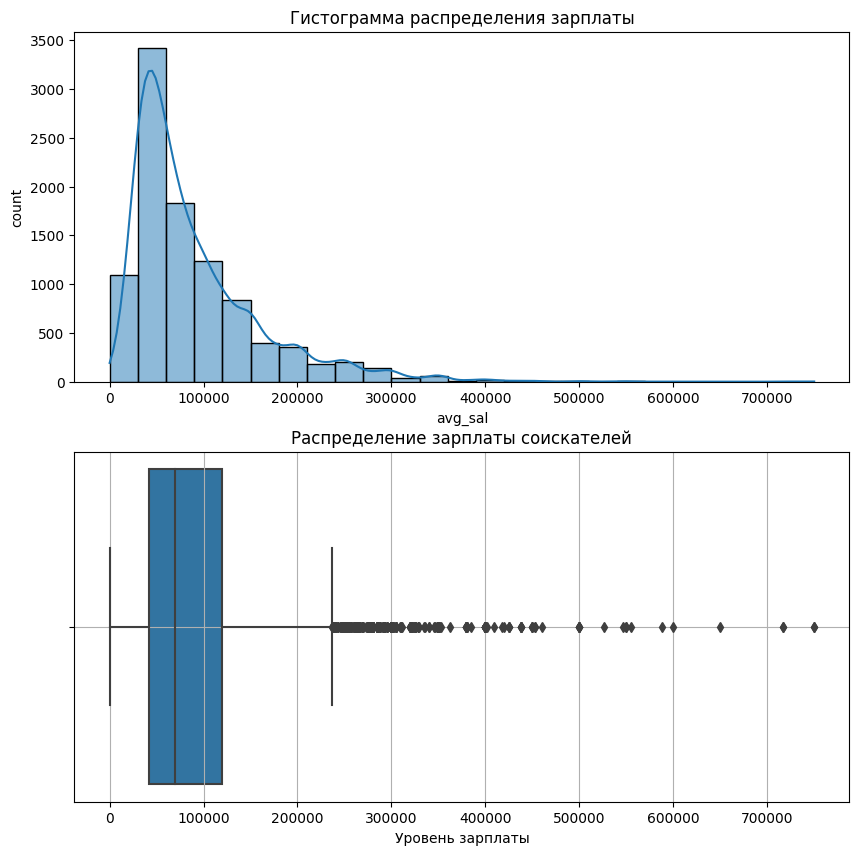

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10,10))
sns.histplot(
    data=relationships,
    x="avg_sal",
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title("Гистограмма распределения зарплаты")
axes[0].set_ylabel("count")

sns.boxplot(
    data=relationships,
    x='avg_sal',
    orient="h",
    width=0.9,
    ax=axes[1]
);
axes[1].set_title('Распределение зарплаты соискателей')    
axes[1].set_xlabel('Уровень зарплаты')
axes[1].grid()

print(relationships["avg_sal"].min())
print(relationships["avg_sal"].max())
print(relationships["avg_sal"].mode())

Мы построили гистограмму и коробчатую диаграмму рядом. Модальное значение з/п соответствует примерно 70 тысячам, большинство предлагаемых з/п находятся в интервале от 40 до  120000, мин. и макс. значения составляют 0 тыс. и 230 тыс. соответственно. На двух графиках хорошо видны выбросы, чтобы понять что это аномалии или реальные зарплаты нужен более детальный анализ.
Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от опыта работы и навыков соискателей. На полученной сводной таблице построим тепловую карту и сравним показатели внутри групп.

Text(50.72222222222221, 0.5, 'Опыт работы')

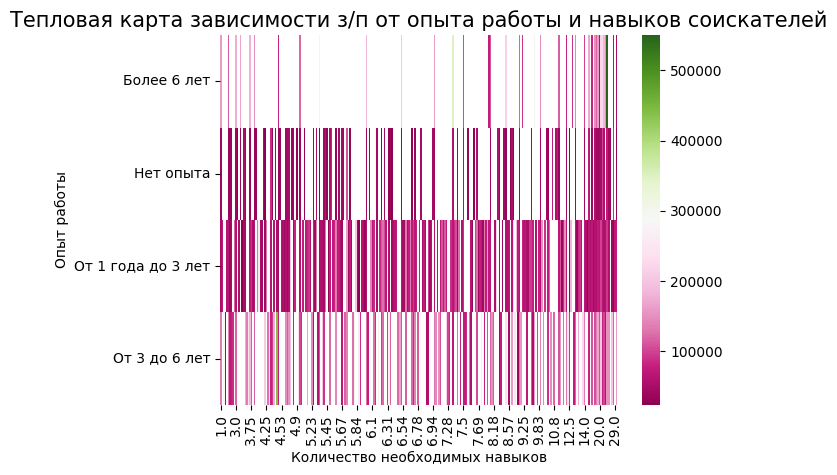

In [56]:
#Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от опыта работы и навыков соискателей
pivot = relationships.pivot_table(
    values="avg_sal",
    index="experience",
    columns="avg_skills",
    aggfunc="median"
)

#Построим график
heatmap = sns.heatmap(data=pivot, cmap='PiYG')
heatmap.set_title("Тепловая карта зависимости з/п от опыта работы и навыков соискателей", fontsize=15)
heatmap.set_xlabel("Количество необходимых навыков")
heatmap.set_ylabel("Опыт работы")


Согласно легенде справа, чем ближе цвет полосы к насыщенно зеленому, тем выше значение медианной зароботной платы. Тепловая карта наглядно иллюстрирует, что для категории соискателей, имеющих большой опыт работы, наблюдается самый интенсивный рост зарплаты и карьерный рост, в отличии от соискателей с минимальным или незначительным опытом (цвет насыщенно розовый). Также на тепловой карте мы видем, что для некоторых работодателей количество навыков не так уж и важно (к примеру, зеленому цвету на карте соответствуют средние значения навыков 4.5 или 7.3). Это еще раз подтверждает значимость признака "опыт работы" при прогнозировании заработной платы.

In [57]:
# не забываем закрыть соединение после окончания работы
connection.close()